In [1]:
import pink
import tools
import numpy as np

print(pink.__version__)
print(np.__version__)

2.4 revision 3b12dc6
1.18.1


In [2]:
import cv2
import glob
import numpy as np

images = np.array([cv2.imread(file) for file in glob.glob('../data/pink/efigi-1.6/efigi-1.6/png/*.png')])
#images = np.array([cv2.imread(file) for file in glob.glob('../data/pink/efigi-1.6/efigi-1.6/png/PGC00356*.png')])
#images = np.array([cv2.imread(file) for file in glob.glob('../data/pink/efigi-1.6/efigi-1.6/png/PGC0057338.png')])
images = np.array([cv2.resize(images[i], dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
         for i in range(len(images))])
images = images.swapaxes(1, 3).astype(np.float32).copy()
images = (images - np.amin(images)) / (np.amax(images) - np.amin(images))

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (4458, 3, 128, 128)
min value:  0.0
max value:  1.0


In [3]:
r = images.shape[2] / 2
r2 = r * r

for i in range(images.shape[2]):
    for j in range(images.shape[3]):
        if ((i - r)*(i - r) + (j - r)*(j - r) >= r2):
            images[:,:,i,j] = 0.0

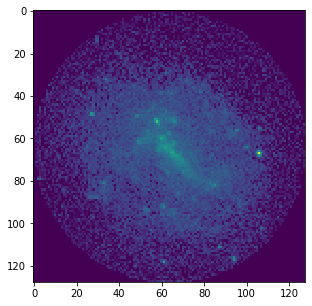

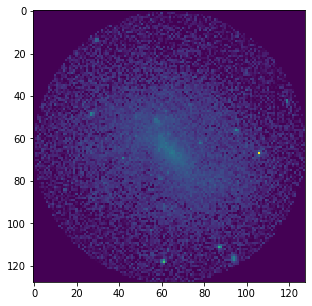

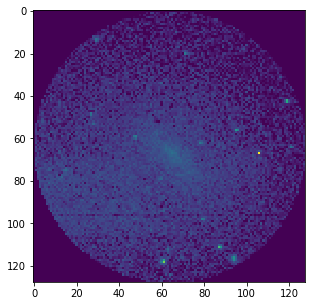

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(images.shape[1]):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0,i,:,:])

In [5]:
import math

som_dim = 4
neuron_dim = int(images.shape[2] / math.sqrt(2.0) * 2.0)
euclid_dim = int(images.shape[2] * math.sqrt(2.0) / 2.0)
number_of_channnels = images.shape[1]

print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

#np_som = np.zeros((som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim)).astype(np.float32)
np_som = np.random.rand(som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som,
                       number_of_rotations=180,
                       use_flip=True,
                       euclidean_distance_dim=euclid_dim,
                       use_gpu=False)

neuron_dim =  181
euclid_dim =  90


In [6]:
from tqdm.notebook import trange

for i in trange(len(images)):
    trainer(pink.Data(images[i], layout="cartesian-3d"))

In [7]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

(4, 4, 3, 181, 181)


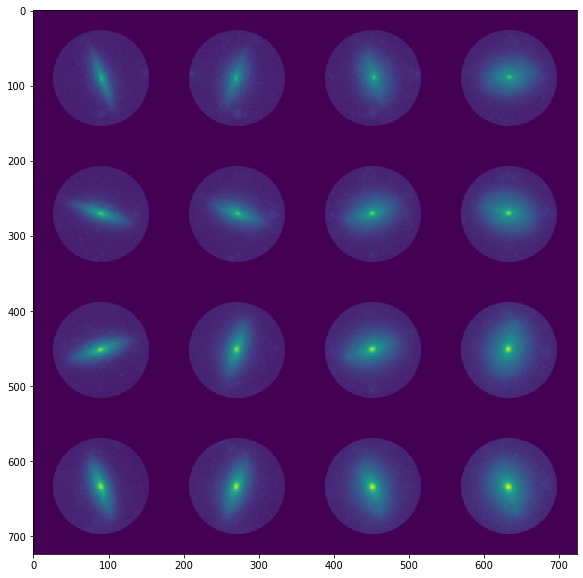

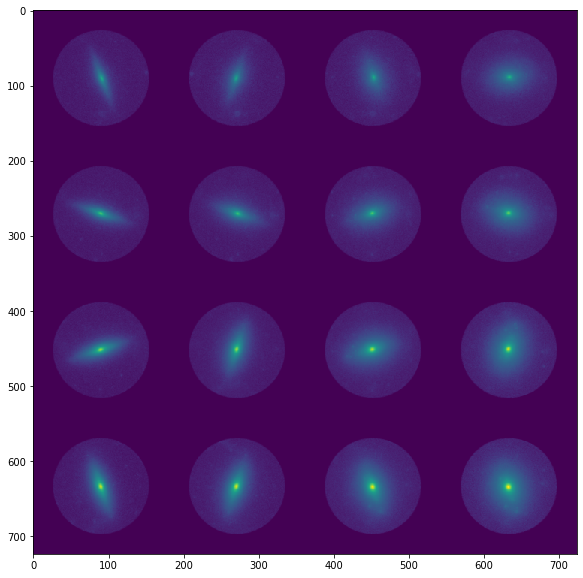

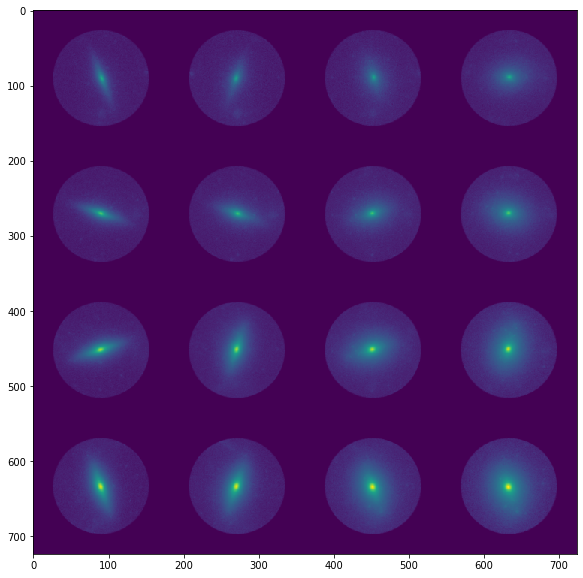

In [8]:
for i in range(images.shape[1]):
    plt.figure(figsize=(10,10))
    plt.imshow(np_som[:,:,i,:,:].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))